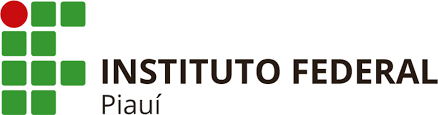
## <font color=green> PROJETO FINAL TEDS - GRUPO D#
---

**AMAZON DATA SCIENCE BOOKS DATASET**

   
O conjunto de dados contém livros obtidos da extração de livros da Amazon relacionados a ciência de dados, estatística, análise de dados, Python, aprendizado profundo e aprendizado de máquina.

https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books


**COMPONENTES**

* Dennis Alencar Brito Barbosa
* Lucas Morais Campelo Marques
* Lucas Moura Ribeiro
* Magno Vital da Silva Lira
* Ray Nogueira Leal
* Romulo Constantino Sousa Silva

---


#INTRODUÇÃO#
---

BIBLIOTECAS

In [ ]:
import numpy as np
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

DATAFRAME

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IFPI/FINAL PROJECT/final_book_dataset_kaggle.csv')
data

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


COMPOSIÇÃO DO DATAFRAME

In [ ]:
data.shape

(946, 18)

CÓPIA DO DATAFRAME

In [ ]:
new_data = data.copy()

#1.0 LIVROS COM MAIS REVIEWS#
---

In [ ]:
datalargest = data['n_reviews'].nlargest(10).astype(int).sort_index()
ten_most_reviewed_books = data[data['n_reviews'] >= datalargest.min()]

In [ ]:
fig = px.bar(ten_most_reviewed_books, x='title', y='avg_reviews' ,log_y=True)
fig.update_layout(
    width = 800,
    height = 1640,
    title = "Dez livros com mais reviews: Média Reviews"
)
fig.show()

#2.0 AUTORES COM MAIS PUBLICAÇÕES#
---

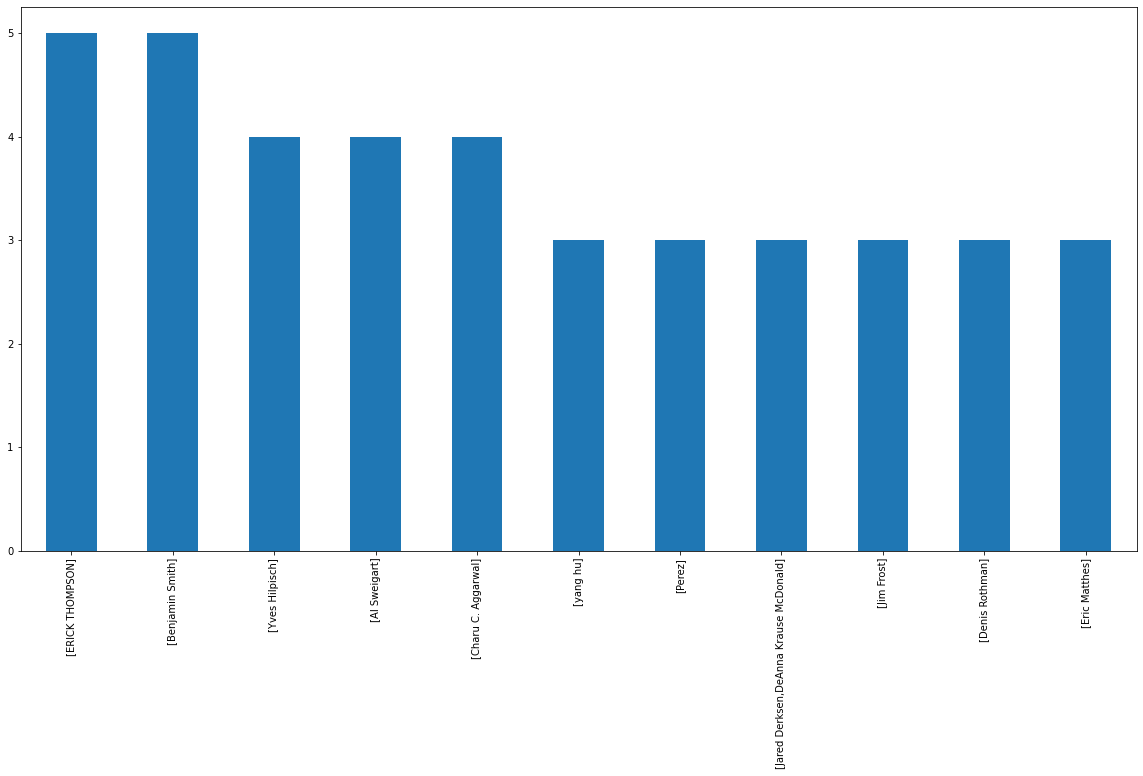

In [ ]:
data.author.value_counts().sort_values(ascending=False)[:11].plot(kind='bar')

#3.0 VALORES NULOS#
---

In [ ]:
data.isnull().sum()

title              0
author           122
price              2
pages             12
avg_reviews      123
n_reviews          0
star5              0
star4              0
star3              0
star2              0
star1              0
dimensions        32
weight             3
language           3
publisher          4
ISBN_13            1
link               0
complete_link      0
dtype: int64

#4.0 QUANTIDADE DE LIVROS PUBLICADOS POR ANO#
---

In [ ]:
#novo dataframe com valores nulos alterados
publisher_validos = new_data['publisher'].fillna('nulo', inplace=True)

In [ ]:
books = []

#adicionando valores válidos em books
for x in new_data['publisher']:
    if x != 'nulo':
        books.append(x)

len(books)

942

In [ ]:
anos = []

for ano in books:
    #dividindo a variável em partes
    year = ano.split()[-1] 
    if len(year.split(')')[0]) == 4:
        anos.append(year.split(')')[0])

#filtrandos os valores referentes a 2023
anos_sem_2023 = [x for x in anos if x != '2023']

#transformando a lista em uma series
series_anos = pd.Series(anos_sem_2023)

#calculando a frequência e ordenando a series
series_anos.value_counts().sort_index()

1972      1
1990      1
1995      1
1998      2
1999      2
2000      1
2002      2
2003      1
2005      1
2006      5
2008      2
2009      5
2010      8
2011      9
2012     14
2013     17
2014     20
2015     12
2016     38
2017     52
2018     62
2019    112
2020    155
2021    186
2022    213
dtype: int64

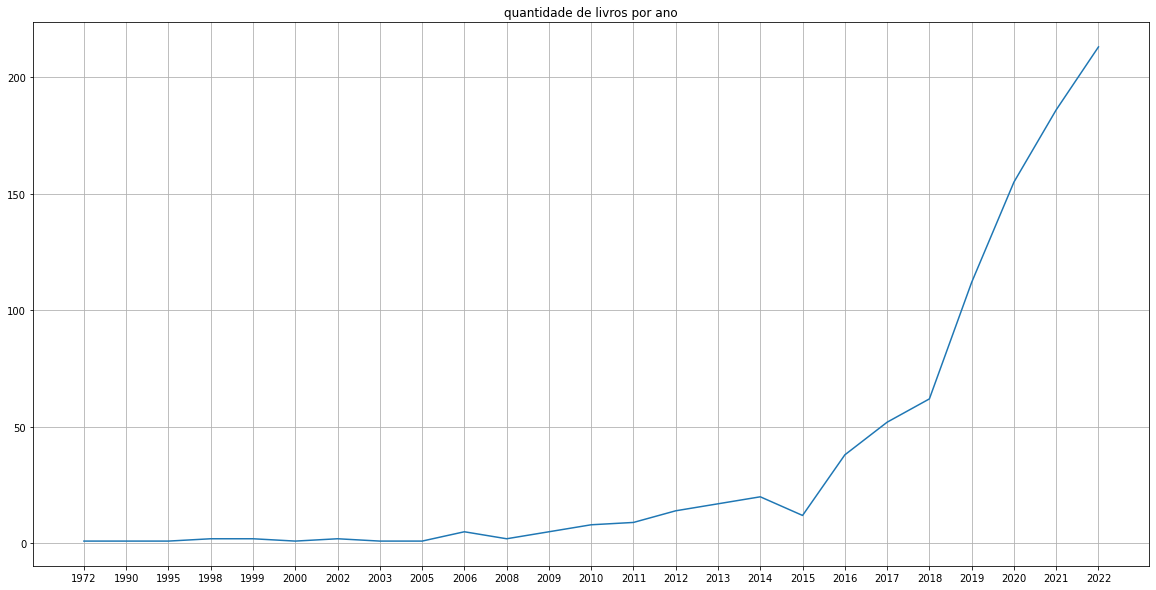

In [ ]:
plt.plot(series_anos.value_counts().sort_index())
plt.rcParams['figure.figsize'] = [20,10]
plt.title('quantidade de livros por ano')
plt.grid(True)
plt.show()

#5.0 IDIOMA DOS LIVROS#
---

In [ ]:
data.language.value_counts()

English    942
Spanish      1
Name: language, dtype: int64

#6.0 GRÁFICO DINÂMICO#
---

In [ ]:
px.scatter(data, x="price", y="pages", color='avg_reviews', color_continuous_scale='icefire'
          , size='n_reviews')

#7.0 Z-SCORE#
---

In [ ]:
def find_outliers(data_set):
    outliers = []
    corte_dp = 3
    media = np.mean(data_set)
    dp = np.std(data_set)
    
    for dado in data_set:
        z_score = (dado - media)/dp 
        if np.abs(z_score) > corte_dp:
            outliers.append(dado)
            
    return outliers

In [ ]:
outliers_price = find_outliers(data['price'])
outliers_price

[179.99,
 197.02,
 169.99,
 169.99,
 168.89,
 168.7,
 177.32,
 199.99,
 179.0,
 174.64,
 165.0,
 179.0,
 169.99,
 179.95,
 170.15,
 223.99,
 188.73,
 197.32,
 215.32,
 240.34,
 179.14,
 279.95,
 189.99,
 181.35,
 197.32,
 191.99,
 170.66,
 191.99,
 253.32,
 223.98,
 171.47,
 181.32,
 186.66]

In [ ]:
outliers_pages = find_outliers(data['pages'])
outliers_pages

[1168.0, 1096.0, 1728.0, 1200.0, 1104.0, 1160.0, 1456.0]

#8.0 GRÁFICOS RELAÇÃO PREÇO-PÁGINAS#
---

In [ ]:
pages_price = pd.DataFrame({'pages' : new_data['pages'],
                        'price' : new_data['price']})

##8.1 Preço##

###8.1.1 Com Outliers###

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



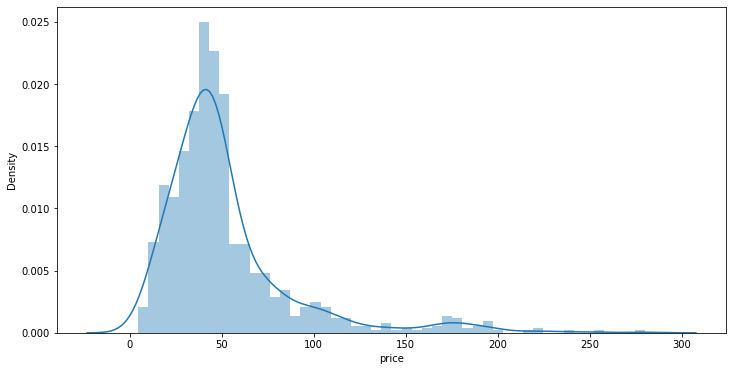

In [ ]:
ax = sns.distplot(pages_price.query('price<280')['price'])
ax.figure.set_size_inches(12,6)
ax

###8.1.2 Sem Outliers###

In [ ]:
preco = data['price']

sem_outlier = []

for x in preco:
    if x < 165:
        sem_outlier.append(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



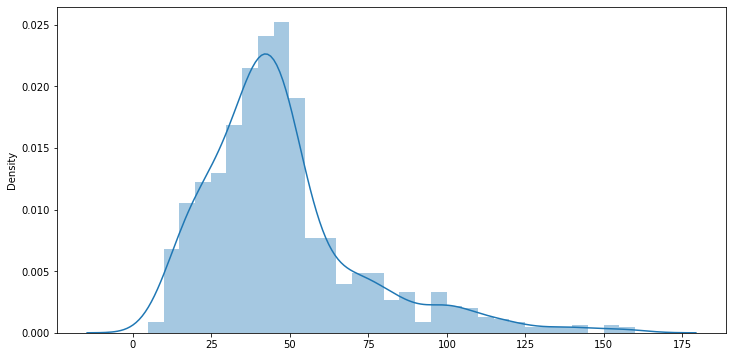

In [ ]:
ax = sns.distplot(sem_outlier)
ax.figure.set_size_inches(12,6)
ax

##8.2 Páginas##

###8.2.1 Com Outliers###

In [ ]:
maximo = pd.Series.max(data['pages'])
maximo

1728.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



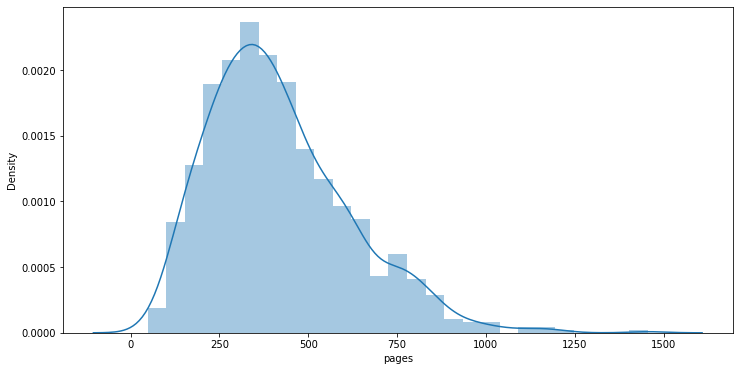

In [ ]:
ax = sns.distplot(pages_price.query('pages<1728')['pages'])
ax.figure.set_size_inches(12,6)
ax

###8.2.2 Sem Outliers###

In [ ]:
paginas = data['pages']

sem_outlier_pages = []

for x in paginas:
    if x < 1096:
        sem_outlier_pages.append(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



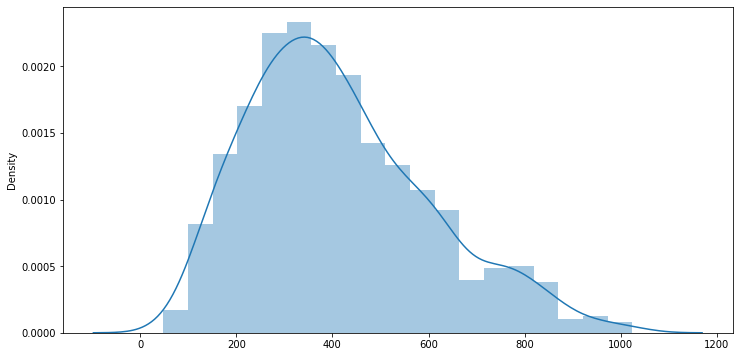

In [ ]:
ax = sns.distplot(sem_outlier_pages)
ax.figure.set_size_inches(12,6)
ax

#9.0 MODELO E CORRELAÇÕES#
---

In [ ]:
#preenchendo os valores nulos da coluna: price
precos=new_data['price']
minimo=pd.Series.min(precos)
maximo=pd.Series.max(precos)
print(f'maximo:{maximo}\nminimo:{minimo}')

maximo:279.95
minimo:4.73


In [ ]:
mediana=sts.median(precos)
media=pd.Series.mean(precos)
print(f'mediana:{mediana}\nmédia:{media}')

mediana:29.99
média:52.10352754237289


In [ ]:
media_price=new_data['price'].fillna(media,inplace=True)

In [ ]:
precos=new_data['price']
media=pd.Series.mean(precos)

In [ ]:
media_price=new_data['price'].fillna(media,inplace=True)

In [ ]:
moda_p=new_data['pages'].mode()
moda_pages=new_data['pages'].fillna(moda_p[0],inplace=True)

In [ ]:
pages_price=pd.DataFrame({'pages' : new_data['pages'],
                        'price' : new_data['price']})

In [ ]:
mediana=sts.median(precos)
media=pd.Series.mean(precos)
print(f'mediana:{mediana}\nmédia:{media}')

mediana:44.185
média:52.10352754237289


In [ ]:
moda=sts.mode(new_data['pages'])
mediana=sts.median(new_data['pages'])
media=pd.Series.mean(new_data['pages'])
print(f'mediana:{mediana}\nmédia:{media}\nmoda:{moda}')

mediana:384.0
média:418.9080338266385
moda:384.0


##9.1 Regressão Linear##
---

In [ ]:
price=pages_price.iloc[:,0].values
pages=pages_price.iloc[:,1].values

In [ ]:
Pages=pages.reshape(-1,1)
Price=price.reshape(-1,1)

In [ ]:
# Separando os dados em treino e teste
# Separando os dados transformados em X e y
X = Pages
y = Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo com os conjuntos de treino
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

R² = 0.16371223250481104


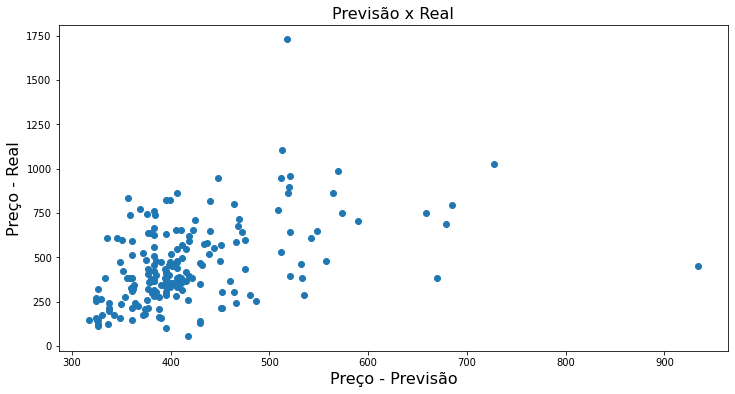

In [ ]:
# Gerando as previsões
y_pred = model.predict(X_test)

# Plotando o valor previsto x valor real, a relação entre os dois deve ser linear
ax = plt.scatter(y_pred, y_test)
ax.figure.set_size_inches(12, 6)
plt.title('Previsão x Real', fontdict={'fontsize': 16})
plt.xlabel('Preço - Previsão', fontdict={'fontsize': 16})
plt.ylabel('Preço - Real', fontdict={'fontsize': 16})
ax

# Mostrando o valor do R²
print('R² =', metrics.r2_score(y_true=y_test, y_pred=y_pred))

In [ ]:
correlacao_pages_price=np.corrcoef(pages,price)
correlacao_pages_price

array([[1.        , 0.43799109],
       [0.43799109, 1.        ]])

##9.2 Correlações Das Classificações##

In [ ]:
price_stars=pd.DataFrame({'star1' : new_data['star1'],
                        'star2': new_data['star2'],
                        'star3': new_data['star3'],
                        'star4': new_data['star4'],
                        'star5': new_data['star5'],
                        'price' : new_data['price'],})
price_stars

,star1,star2,star3,star4,star5,price
0,0.01,0.02,0.05,0.18,0.74,24.49
1,0.04,0.03,0.06,0.10,0.77,26.00
2,0.00,0.00,0.00,0.04,0.96,50.76
3,0.05,0.05,0.05,0.05,0.79,44.80
4,0.03,0.03,0.08,0.15,0.71,36.99
...,...,...,...,...,...,...
941,0.03,0.02,0.06,0.16,0.74,28.33
942,0.00,0.00,0.19,0.11,0.70,59.23
943,0.05,0.01,0.07,0.14,0.72,129.99
944,0.04,0.02,0.04,0.13,0.78,47.76


###9.2.1 Preço e Classificações###

In [ ]:
price_stars.corr().style.background_gradient(cmap='Blues')

,star1,star2,star3,star4,star5,price
star1,1.000000,0.367137,0.212710,0.038144,0.043879,0.088923
star2,0.367137,1.000000,0.458149,0.117888,-0.005893,0.005285
star3,0.212710,0.458149,1.000000,0.282943,0.013784,-0.089523
star4,0.038144,0.117888,0.282943,1.000000,0.092087,-0.131196
star5,0.043879,-0.005893,0.013784,0.092087,1.000000,-0.055942
price,0.088923,0.005285,-0.089523,-0.131196,-0.055942,1.000000


###9.2.2 Páginas e Classificações###

In [ ]:
pages_stars=pd.DataFrame({'star1' : new_data['star1'],
                        'star2': new_data['star2'],
                        'star3': new_data['star3'],
                        'star4': new_data['star4'],
                        'star5': new_data['star5'],
                        'pages' : new_data['pages'],})
pages_stars

,star1,star2,star3,star4,star5,pages
0,0.01,0.02,0.05,0.18,0.74,272.0
1,0.04,0.03,0.06,0.10,0.77,301.0
2,0.00,0.00,0.00,0.04,0.96,446.0
3,0.05,0.05,0.05,0.05,0.79,347.0
4,0.03,0.03,0.08,0.15,0.71,413.0
...,...,...,...,...,...,...
941,0.03,0.02,0.06,0.16,0.74,832.0
942,0.00,0.00,0.19,0.11,0.70,260.0
943,0.05,0.01,0.07,0.14,0.72,704.0
944,0.04,0.02,0.04,0.13,0.78,252.0


In [ ]:
pages_stars.corr().style.background_gradient(cmap='Blues')

,star1,star2,star3,star4,star5,pages
star1,1.000000,0.367137,0.212710,0.038144,0.043879,0.107520
star2,0.367137,1.000000,0.458149,0.117888,-0.005893,0.056105
star3,0.212710,0.458149,1.000000,0.282943,0.013784,-0.022569
star4,0.038144,0.117888,0.282943,1.000000,0.092087,-0.044698
star5,0.043879,-0.005893,0.013784,0.092087,1.000000,0.134769
pages,0.107520,0.056105,-0.022569,-0.044698,0.134769,1.000000


###9.2.3 Classificações###

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



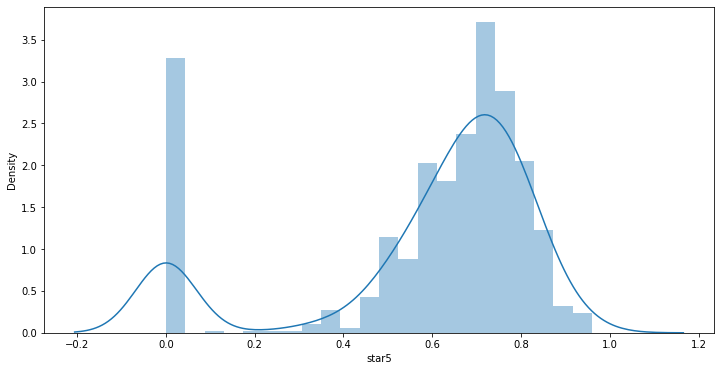

In [ ]:
ax=sns.distplot(new_data.query('star5<1')['star5'])
ax.figure.set_size_inches(12,6)
ax

In [ ]:
moda=sts.mode(new_data['star5'])
mediana=sts.median(new_data['star5'])
media=pd.Series.mean(new_data['star5'])
print(f'mediana:{mediana}\nmédia:{media}\nmoda:{moda}')

mediana:0.7
média:0.6256025369978859
moda:0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



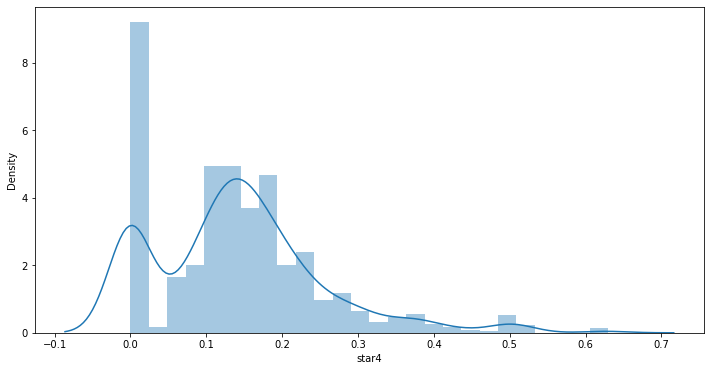

In [ ]:
ax=sns.distplot(new_data.query('star4<1')['star4'])
ax.figure.set_size_inches(12,6)
ax

In [ ]:
moda=sts.mode(new_data['star4'])
mediana=sts.median(new_data['star4'])
media=pd.Series.mean(new_data['star4'])
print(f'mediana:{mediana}\nmédia:{media}\nmoda:{moda}')

mediana:0.14
média:0.14083509513742073
moda:0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



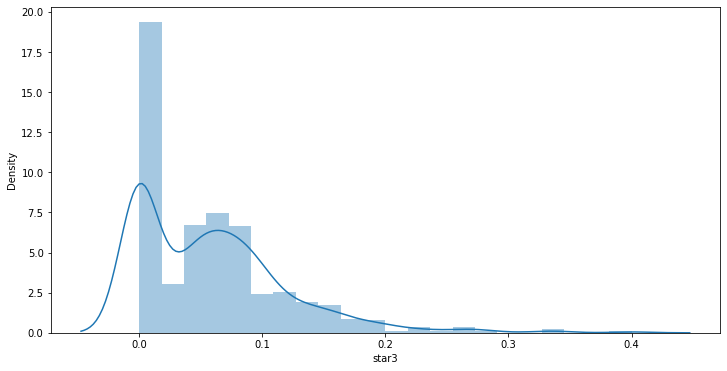

In [ ]:
ax=sns.distplot(new_data.query('star3<1')['star3'])
ax.figure.set_size_inches(12,6)
ax

In [ ]:
moda=sts.mode(new_data['star3'])
mediana=sts.median(new_data['star3'])
media=pd.Series.mean(new_data['star3'])
print(f'mediana:{mediana}\nmédia:{media}\nmoda:{moda}')

mediana:0.05
média:0.0581923890063425
moda:0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



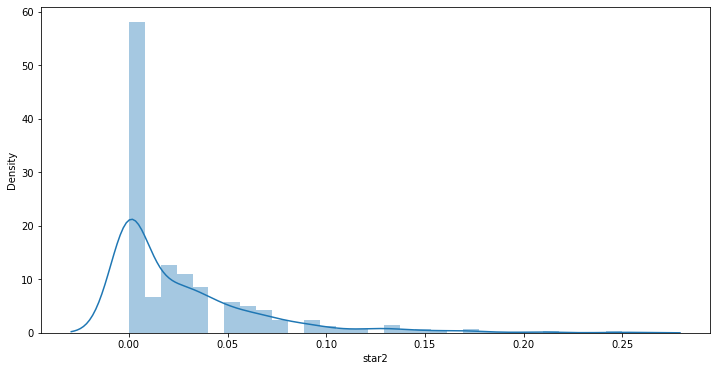

In [ ]:
ax=sns.distplot(new_data.query('star2<1')['star2'])
ax.figure.set_size_inches(12,6)
ax

In [ ]:
moda=sts.mode(new_data['star2'])
mediana=sts.median(new_data['star2'])
media=pd.Series.mean(new_data['star2'])
print(f'mediana:{mediana}\nmédia:{media}\nmoda:{moda}')

mediana:0.01
média:0.02657505285412262
moda:0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



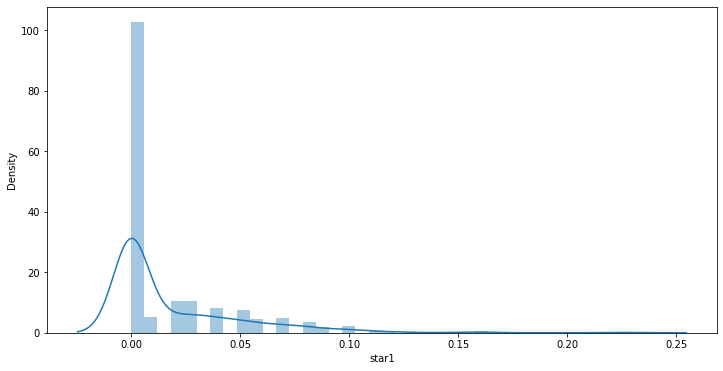

In [ ]:
ax=sns.distplot(new_data.query('star1<1')['star1'])
ax.figure.set_size_inches(12,6)
ax

In [ ]:
moda=sts.mode(new_data['star1'])
mediana=sts.median(new_data['star1'])
media=pd.Series.mean(new_data['star1'])
print(f'mediana:{mediana}\nmédia:{media}\nmoda:{moda}')

mediana:0.0
média:0.018731501057082454
moda:0.0


"Data has a better idea"

**OBRIGADO PELA ATENÇÃO!**